#### **ANÁLISIS DE LA DISTANCIA MÍNIMA DE INTERSECCIÓN ORBITAL ASTEROIDAL**

#### **EDA**

1. **Carga y concatenación de datos**

In [72]:
import pandas as pd

part1 = pd.read_csv('../Data/dataset_part1.csv')
part2 = pd.read_csv('../Data/dataset_part2.csv')
part3 = pd.read_csv('../Data/dataset_part3.csv')
part4 = pd.read_csv('../Data/dataset_part4.csv')
part5 = pd.read_csv('../Data/dataset_part5.csv')

total_data = pd.concat([part1, part2, part3, part4, part5], ignore_index=True)
total_data.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4,939.4,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


In [73]:
total_data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

Creación de una nueva tabla para almacenar los datos, se insertarán los datos del DataFrame en la tabla SQL.

Como la cantidad de datos es muy grande (mas de 900000 datos) cogemos una muestra aleatoria de 150000.


In [74]:
import sqlite3

conn = sqlite3.connect("asteroids_database.db")

#Creamos una tabla para almacenar los datos, se insertan los datos del DataFrame en la tabla SQL
total_data.to_sql("asteroids_table", conn, if_exists = "replace", index = False)

958524

In [75]:
query = '''
    SELECT *
    FROM asteroids_table
    ORDER BY RANDOM()
    LIMIT 150000
'''

sample_total_data = pd.read_sql_query(query, conn)

print("DataFrame leído de la base de datos SQL:")

print(sample_total_data.head())

#Cerrar la conexión

conn.close()

DataFrame leído de la base de datos SQL:
         id    spkid            full_name        pdes  name prefix neo   pha  \
0  a0103913  2103913   103913 (2000 DN60)      103913  None   None   N     N   
1  bK13S53L  3887964          (2013 SL53)   2013 SL53  None   None   N  None   
2  a0358129  2358129   358129 (2006 QJ54)      358129  None   None   N     N   
3  bK15Q08X  3726652           (2015 QX8)    2015 QX8  None   None   Y     N   
4  bK16PD4X  3934967         (2016 PX134)  2016 PX134  None   None   N     N   

      H  diameter  ...   sigma_i  sigma_om   sigma_w  sigma_ma      sigma_ad  \
0  15.7     4.418  ...  0.000005  0.000073  0.000085  0.000043  2.382800e-08   
1  18.1       NaN  ...       NaN       NaN       NaN       NaN           NaN   
2  16.2       NaN  ...  0.000007  0.000036  0.000046  0.000036  3.581300e-08   
3  24.4       NaN  ...  0.047761  0.014927  0.044049  0.287320  1.211300e-02   
4  19.4       NaN  ...  0.000073  0.000472  0.005201  0.008182  4.672400e-05  

In [76]:
# Guardado de la muestra
sample_total_data.to_csv('sampled_dataset.csv', index=False)

In [77]:
# Tamaño del dataset
sample_total_data.shape

(150000, 45)

In [78]:
# Información del dataset
sample_total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150000 non-null  object 
 1   spkid           150000 non-null  int64  
 2   full_name       150000 non-null  object 
 3   pdes            150000 non-null  object 
 4   name            3470 non-null    object 
 5   prefix          4 non-null       object 
 6   neo             149999 non-null  object 
 7   pha             146827 non-null  object 
 8   H               149041 non-null  float64
 9   diameter        21174 non-null   float64
 10  albedo          20990 non-null   float64
 11  diameter_sigma  21155 non-null   float64
 12  orbit_id        150000 non-null  object 
 13  epoch           150000 non-null  float64
 14  epoch_mjd       150000 non-null  int64  
 15  epoch_cal       150000 non-null  float64
 16  equinox         150000 non-null  object 
 17  e         

2. **Exploración y limpieza de datos**

Eliminación de duplicados -> no hay duplicados

In [79]:
if sample_total_data.duplicated().sum():
    sample_total_data = sample_total_data.drop_duplicates()
print(sample_total_data.shape)
sample_total_data.head(1)

(150000, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0103913,2103913,103913 (2000 DN60),103913,None,None,N,N,15.7,4.418,...,0.000005,0.000073,0.000085,0.000043,2.382800e-08,2.628300e-09,0.000203,0.000021,MBA,0.61701


Contabilización de columnas numéricas y categóricas

In [80]:
# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 35
Columnas numéricas: ['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
Número de columnas categóricas: 10
Columnas categóricas: ['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class']


Eliminamos las columnas de `id` que nos propocionan info y los sigmas, que son incertidumbres del resto de variables.

In [81]:
sample_total_data.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,equinox,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
0,N,N,15.7,4.418,0.063,1.252,2459000.5,59000,20200531.0,J2000,...,166.020255,2.919012,0.214646,2.458227e+06,2.018042e+07,1677.180614,4.59187,1.61901,630.070122,MBA


3. Análisis de variables univariante

No se graficará "host_name" -> existen demasiados nombres como para crear histograma

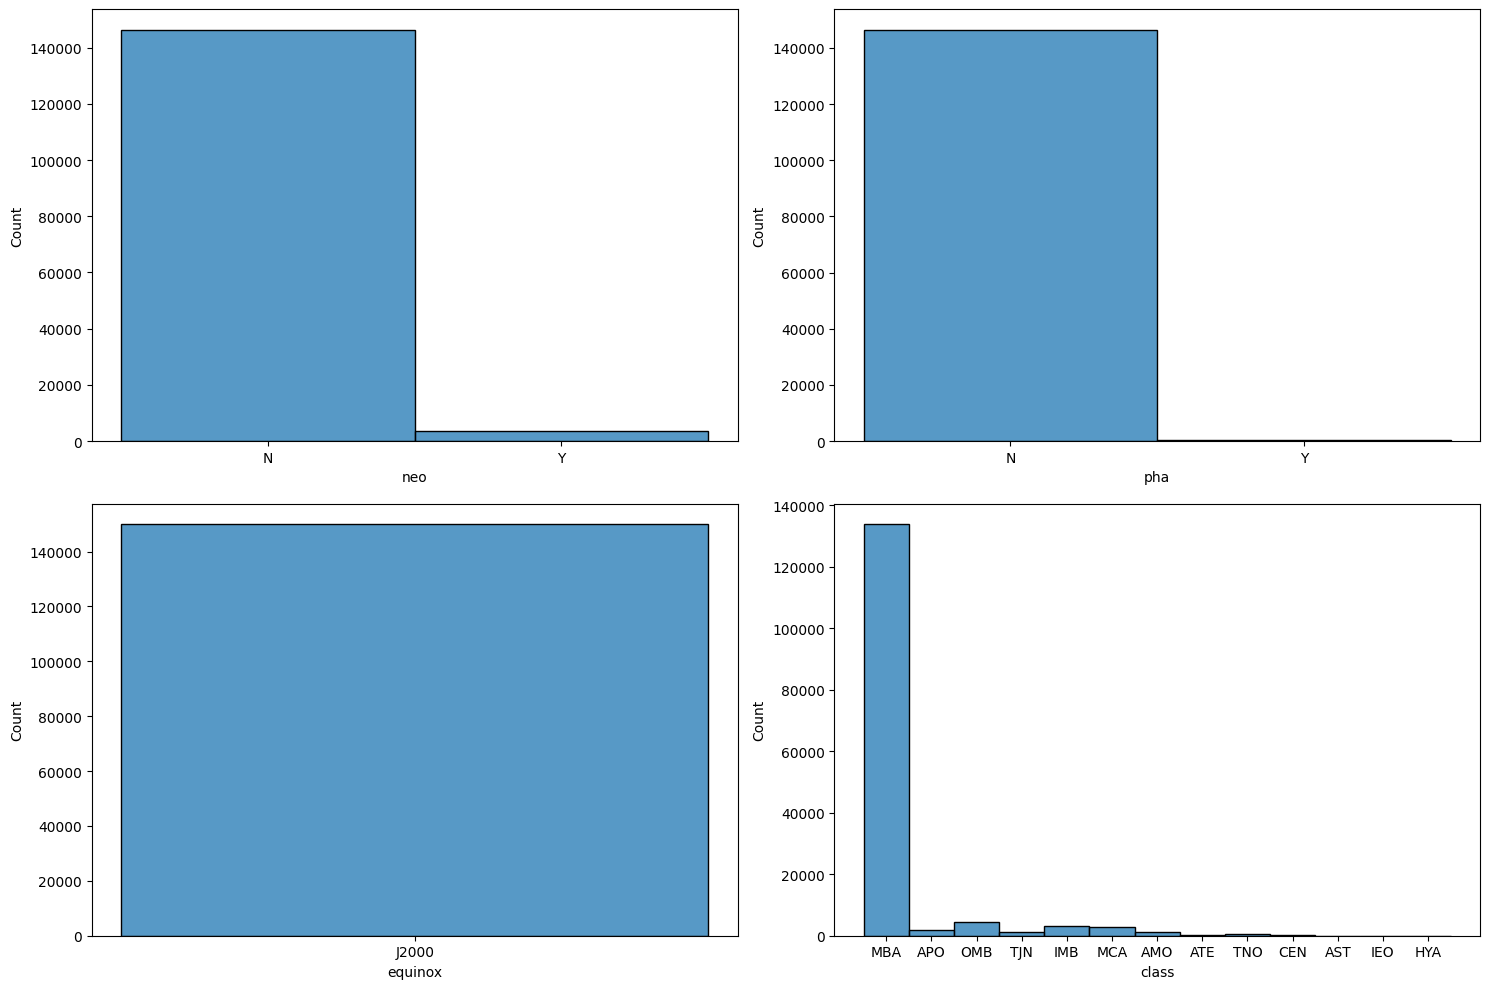

In [82]:
# Análisis variables categóricas 'neo', 'pha', 'equinox', 'class'
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

# Histograma múltiple
#"host_name" -> existen demasiados nombres como para crear histograma

sns.histplot(ax = axis[0][0], data = sample_total_data, x = "neo")
sns.histplot(ax = axis[0][1], data = sample_total_data, x = "pha")
sns.histplot(ax = axis[1][0], data = sample_total_data, x = "equinox")
sns.histplot(ax = axis[1][1], data = sample_total_data, x = "class")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones:

neo: la mayoría de objetos no son cercanos a la tierra

pha: la mayoría de objetos no son potencialmente peligroso

equinox:sólo existe una categoría, podemos eliminarla

class: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter


Eliminación de información irrelevante de variables categóricas, conclusión sacada de representación histograma

In [83]:
sample_total_data.drop(["equinox"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
0,N,N,15.7,4.418,0.063,1.252,2459000.5,59000,20200531.0,0.05661,...,166.020255,2.919012,0.214646,2.458227e+06,2.018042e+07,1677.180614,4.59187,1.61901,630.070122,MBA


Análisis univariante variables numéricas ``H``, ``diameter``, ``diameter_sigma``, ``albedo``, ``epoch``, ``epoch_mjd``, ``epoch_cal``, ``e``, ``a``, ``q``, ``i``, ``om``, ``w``, ``ma``, ``ad``, ``n``, ``tp``, ``tp_cal``, ``per``, ``per_y``, ``moid``, ``moid_ld``


In [84]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "H")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "H")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "diameter") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "diameter")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "diameter_sigma")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "diameter_sigma")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "albedo") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "albedo")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "epoch")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "epoch")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "epoch_mjd") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "epoch_mjd")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "epoch_cal")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "epoch_cal")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "e")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "e")

plt.tight_layout()

plt.show()'''


'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nfig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={\'height_ratios\': [6, 1, 6, 1]})\n\n\nsns.histplot(ax = axis[0, 0], data = sample_total_data, x = "H")\nsns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "H")\n\nsns.histplot(ax = axis[0, 1], data = sample_total_data, x = "diameter") \nsns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "diameter")\n\nsns.histplot(ax = axis[0, 2], data = sample_total_data, x = "diameter_sigma")\nsns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "diameter_sigma")\n\nsns.histplot(ax = axis[0, 3], data = sample_total_data, x = "albedo") \nsns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "albedo")\n\nsns.histplot(ax = axis[2, 0], data = sample_total_data, x = "epoch")\nsns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "epoch")\n\nsns.histplot(ax = axis[2, 1], data = sample_total_data, x = "epoch_mjd") \nsns.boxplot(ax = 

In [85]:
'''import matplotlib.pyplot as plt
import seaborn as sns

# 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n'

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "a")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "a")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "q") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "q")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "i")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "i")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "om") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "om")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "w")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "w")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "ma") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "ma")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "ad")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "ad")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "n")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "n")

plt.tight_layout()

plt.show()'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# \'a\', \'q\', \'i\', \'om\', \'w\', \'ma\', \'ad\', \'n\'\n\nfig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={\'height_ratios\': [6, 1, 6, 1]})\n\n\nsns.histplot(ax = axis[0, 0], data = sample_total_data, x = "a")\nsns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "a")\n\nsns.histplot(ax = axis[0, 1], data = sample_total_data, x = "q") \nsns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "q")\n\nsns.histplot(ax = axis[0, 2], data = sample_total_data, x = "i")\nsns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "i")\n\nsns.histplot(ax = axis[0, 3], data = sample_total_data, x = "om") \nsns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "om")\n\nsns.histplot(ax = axis[2, 0], data = sample_total_data, x = "w")\nsns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "w")\n\nsns.histplot(ax = axis[2, 1], data = sample_total_data, x = "ma") \nsns.boxplot(ax = axis[3, 1], data = sa

``tp``, ``tp_cal``, ``per``, ``per_y``, ``moid``, ``moid_ld``

In [86]:
'''fig, axis = plt.subplots(4, 3, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "tp")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "tp")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "tp_cal") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "tp_cal")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "per")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "per")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "per_y") 
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "per_y")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "moid")
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "moid")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "moid_ld") 
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "moid_ld")

plt.tight_layout()

plt.show()'''

'fig, axis = plt.subplots(4, 3, figsize = (30, 15), gridspec_kw={\'height_ratios\': [6, 1, 6, 1]})\n\n\nsns.histplot(ax = axis[0, 0], data = sample_total_data, x = "tp")\nsns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "tp")\n\nsns.histplot(ax = axis[0, 1], data = sample_total_data, x = "tp_cal") \nsns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "tp_cal")\n\nsns.histplot(ax = axis[0, 2], data = sample_total_data, x = "per")\nsns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "per")\n\nsns.histplot(ax = axis[2, 0], data = sample_total_data, x = "per_y") \nsns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "per_y")\n\nsns.histplot(ax = axis[2, 1], data = sample_total_data, x = "moid")\nsns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "moid")\n\nsns.histplot(ax = axis[2, 2], data = sample_total_data, x = "moid_ld") \nsns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "moid_ld")\n\nplt.tight_layout()\n\nplt.show()'

Eliminación de epoch y epoch_cal al ser redundantes con ``epoch_mjd`` (la que está modificada para ser mas manejable)

In [87]:
sample_total_data.drop(['epoch','epoch_cal'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch_mjd,e,a,q,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
0,N,N,15.7,4.418,0.063,1.252,59000,0.05661,2.762619,2.606225,...,166.020255,2.919012,0.214646,2.458227e+06,2.018042e+07,1677.180614,4.59187,1.61901,630.070122,MBA


4. Análisis de variables multivariante

Analisis de variables categorica - categorica --> El mayor porcentaje de asteroides está lejos del planeta tierra

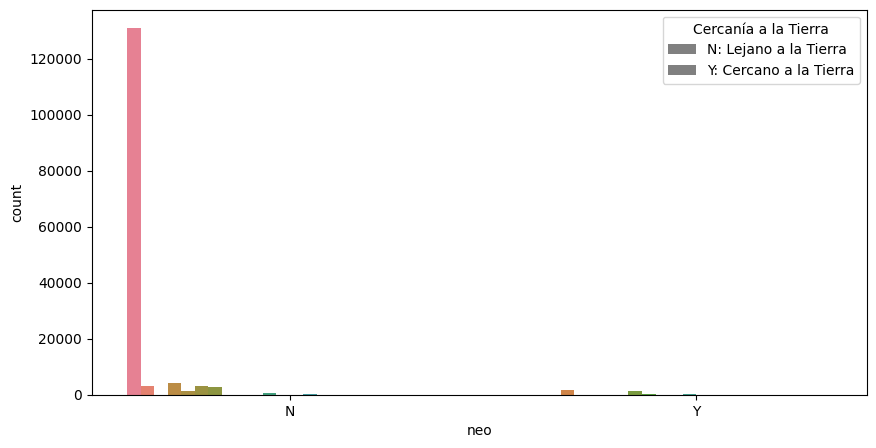

In [88]:
# Crear una nueva columna combinando las variables deseadas
sample_total_data['combined_hue'] = (sample_total_data['pha'].astype(str) + '_' +
                                     
                                     sample_total_data['class'].astype(str))

# Crear el gráfico
fig, axis = plt.subplots(figsize=(10, 5))

sns.countplot(data=sample_total_data, x="neo", hue="combined_hue", ax=axis, legend=False)

# Definir la leyenda personalizada
legend_labels = {'N_NEO_orbit_id_equinox_class': 'N: Lejano a la Tierra',
                 'Y_NEO_orbit_id_equinox_class': 'Y: Cercano a la Tierra'}

# Crear la leyenda manualmente
handles = []
for key, label in legend_labels.items():
    handles.append(axis.bar(0, 0, color='gray', label=label))  # Crear una barra dummy para cada etiqueta

# Mostrar la leyenda fuera del gráfico
axis.legend(handles=handles, labels=legend_labels.values(), loc='upper right', title='Cercanía a la Tierra')

# Mostrar el gráfico
plt.show()

Análisis de correlaciones variables categóricas

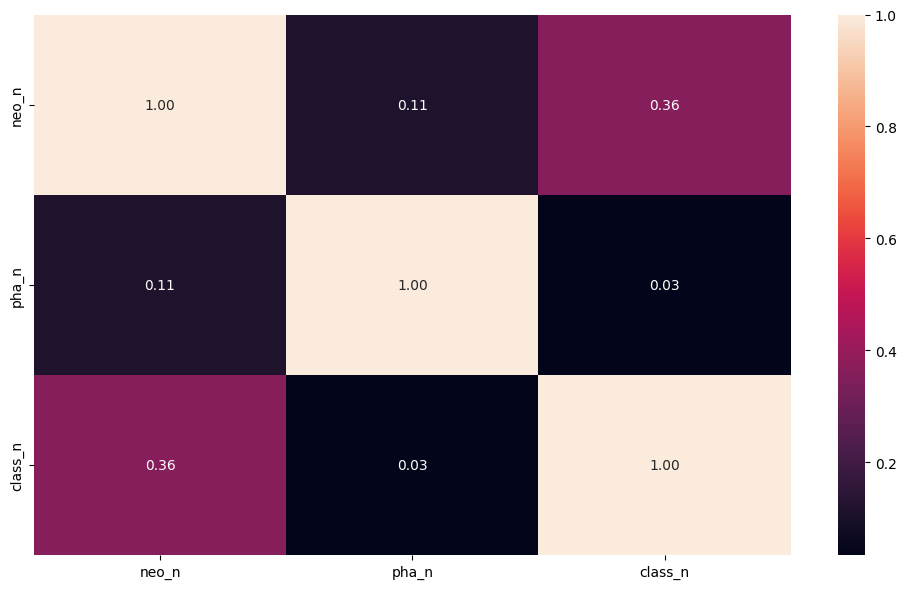

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Factoriazción de variables categóricas
sample_total_data["neo_n"] = pd.factorize(sample_total_data["neo"])[0]
sample_total_data["pha_n"] = pd.factorize(sample_total_data["pha"])[0]
sample_total_data["class_n"] = pd.factorize(sample_total_data["class"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(sample_total_data[["neo_n", "pha_n", "class_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Análisis numérico-numérico -> scatter plots and heatmaps

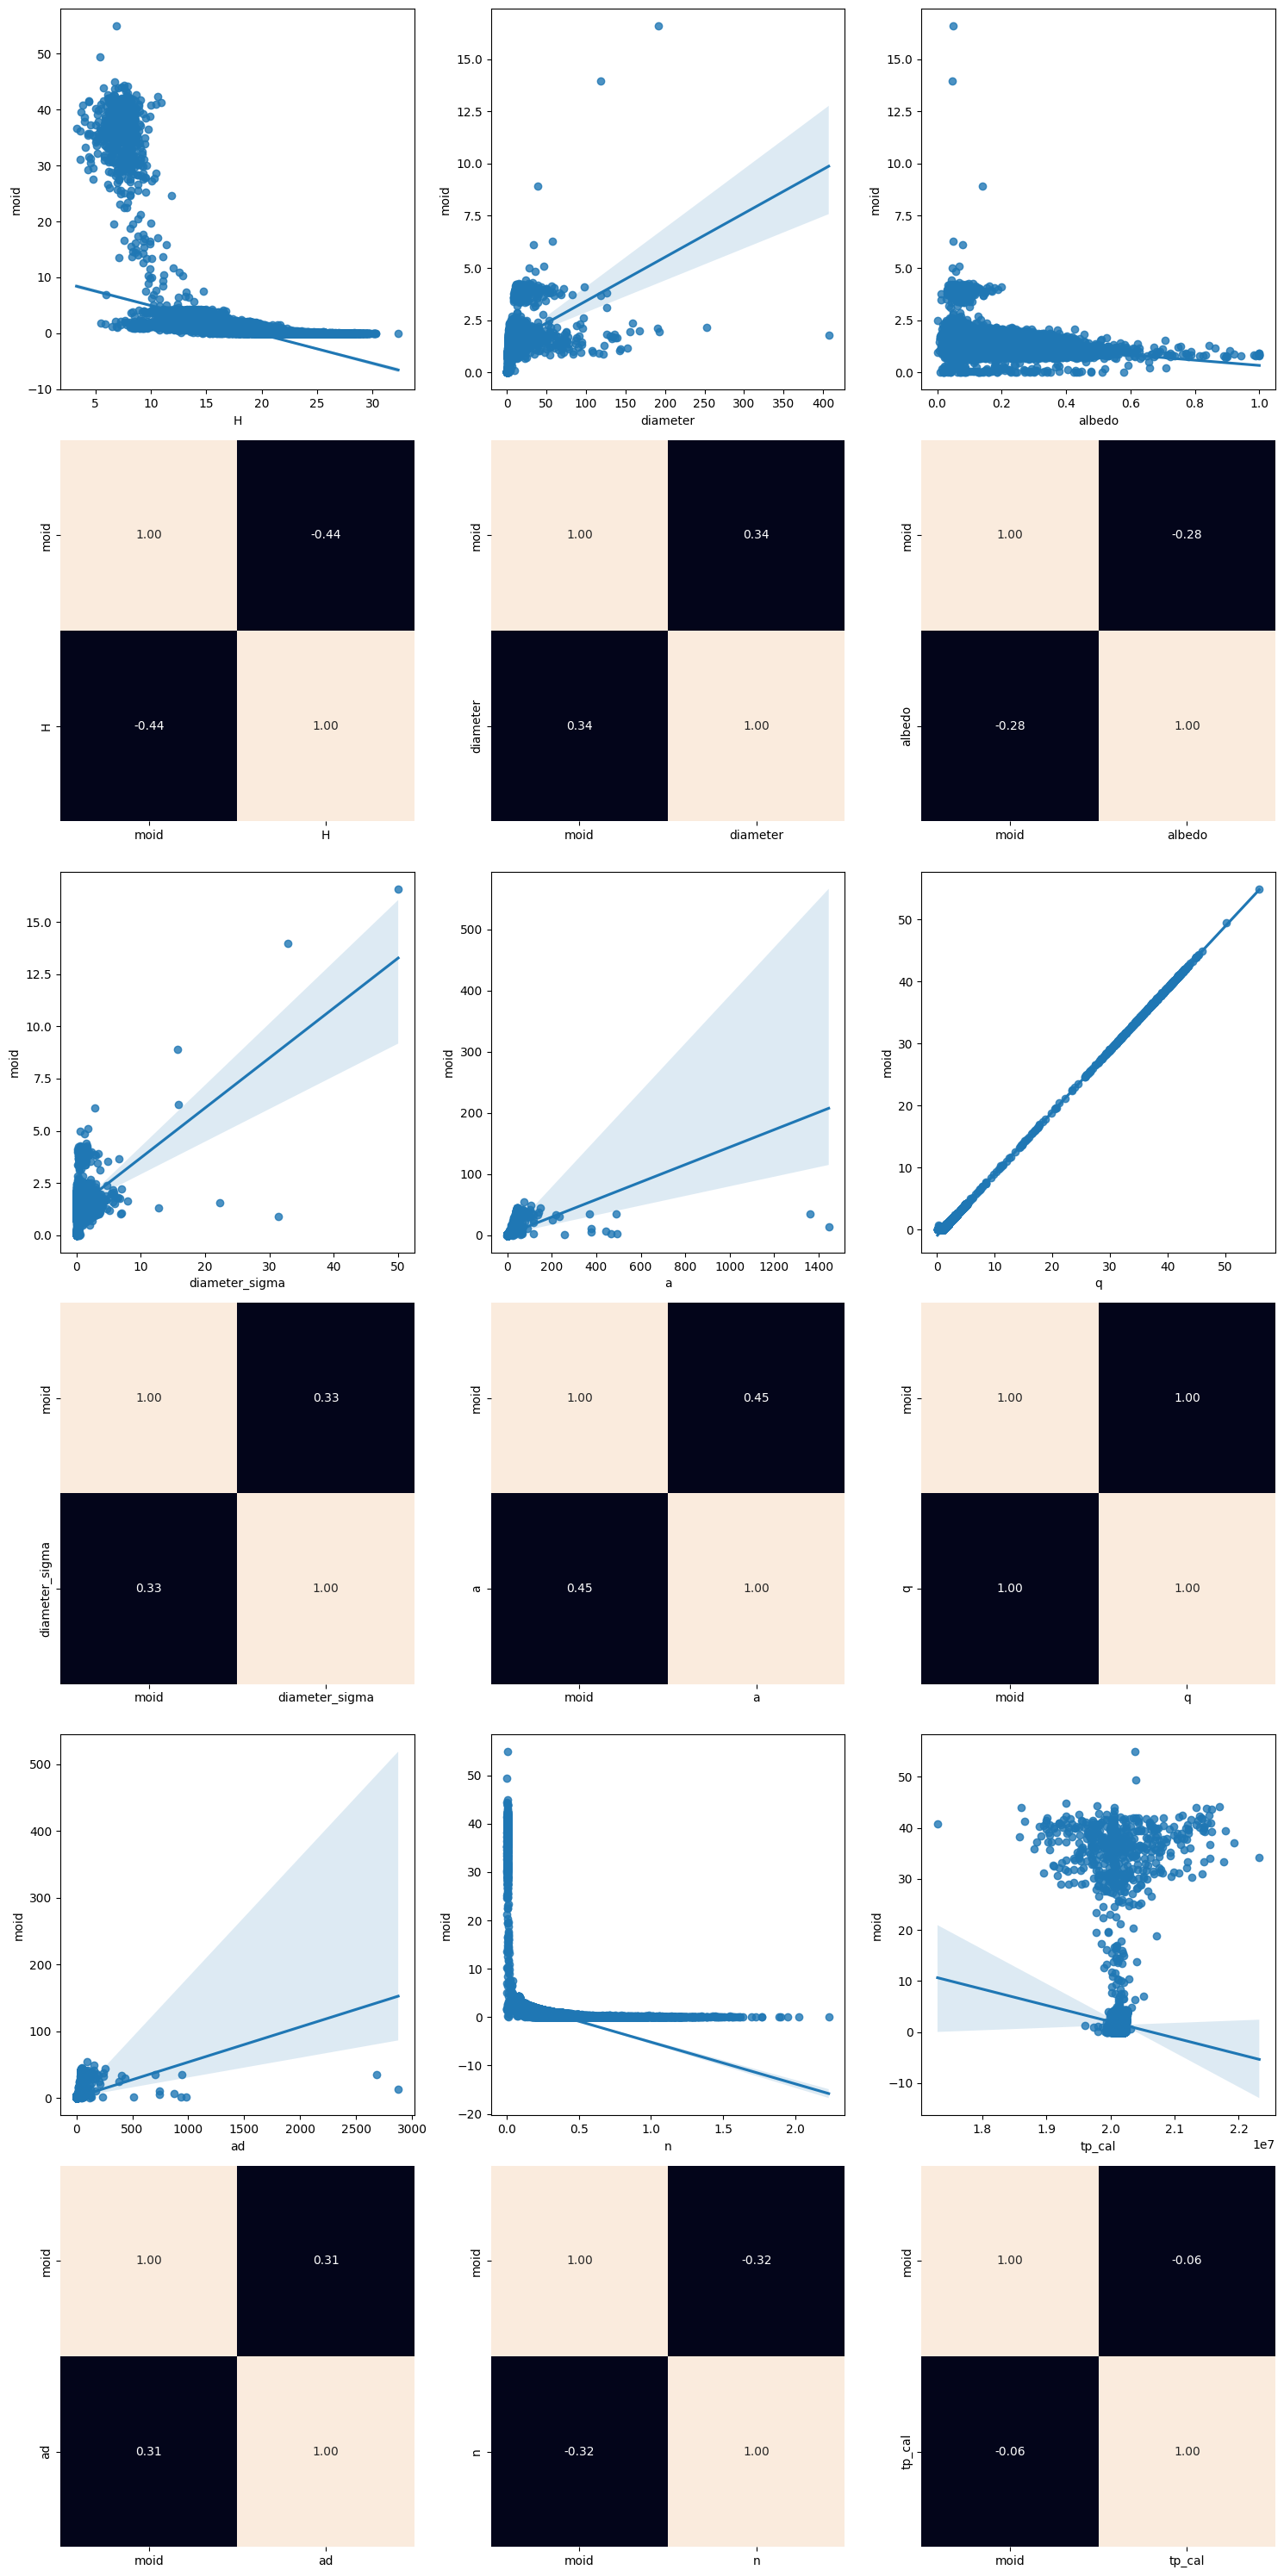

In [90]:


ig, axis = plt.subplots(6, 3, figsize=(15, 30))


sns.regplot(data=sample_total_data, x="H", y="moid", ax=axis[0, 0]) 
sns.heatmap(sample_total_data[["moid", "H"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=sample_total_data, x="diameter", y="moid", ax=axis[0, 1]) 
sns.heatmap(sample_total_data[["moid", "diameter"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=sample_total_data, x="albedo", y="moid", ax=axis[0, 2]) 
sns.heatmap(sample_total_data[["moid", "albedo"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(data=sample_total_data, x="diameter_sigma", y="moid", ax=axis[2, 0]) 
sns.heatmap(sample_total_data[["moid", "diameter_sigma"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(data=sample_total_data, x="a", y="moid", ax=axis[2, 1]) 
sns.heatmap(sample_total_data[["moid", "a"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(data=sample_total_data, x="q", y="moid", ax=axis[2, 2]) 
sns.heatmap(sample_total_data[["moid", "q"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2], cbar=False)

sns.regplot(data=sample_total_data, x="ad", y="moid", ax=axis[4, 0]) 
sns.heatmap(sample_total_data[["moid", "ad"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(data=sample_total_data, x="n", y="moid", ax=axis[4, 1]) 
sns.heatmap(sample_total_data[["moid", "n"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(data=sample_total_data, x="tp_cal", y="moid", ax=axis[4, 2]) 
sns.heatmap(sample_total_data[["moid", "tp_cal"]].corr(), annot=True, fmt=".2f", ax=axis[5, 2], cbar=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Eliminación de información irrelevante de variables numéricas -> ``per`` y ``moid_Id`` por ser información irrelevante, las demás por no tener correlación.


In [91]:
sample_total_data.drop(["per","moid_ld", "epoch_mjd","e", "i", "om", "w", "ma", "tp"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class,combined_hue,neo_n,pha_n,class_n
0,N,N,15.7,4.418,0.063,1.252,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.59187,1.61901,MBA,N_MBA,0,0,0


Análisis numérico-categórico completo.

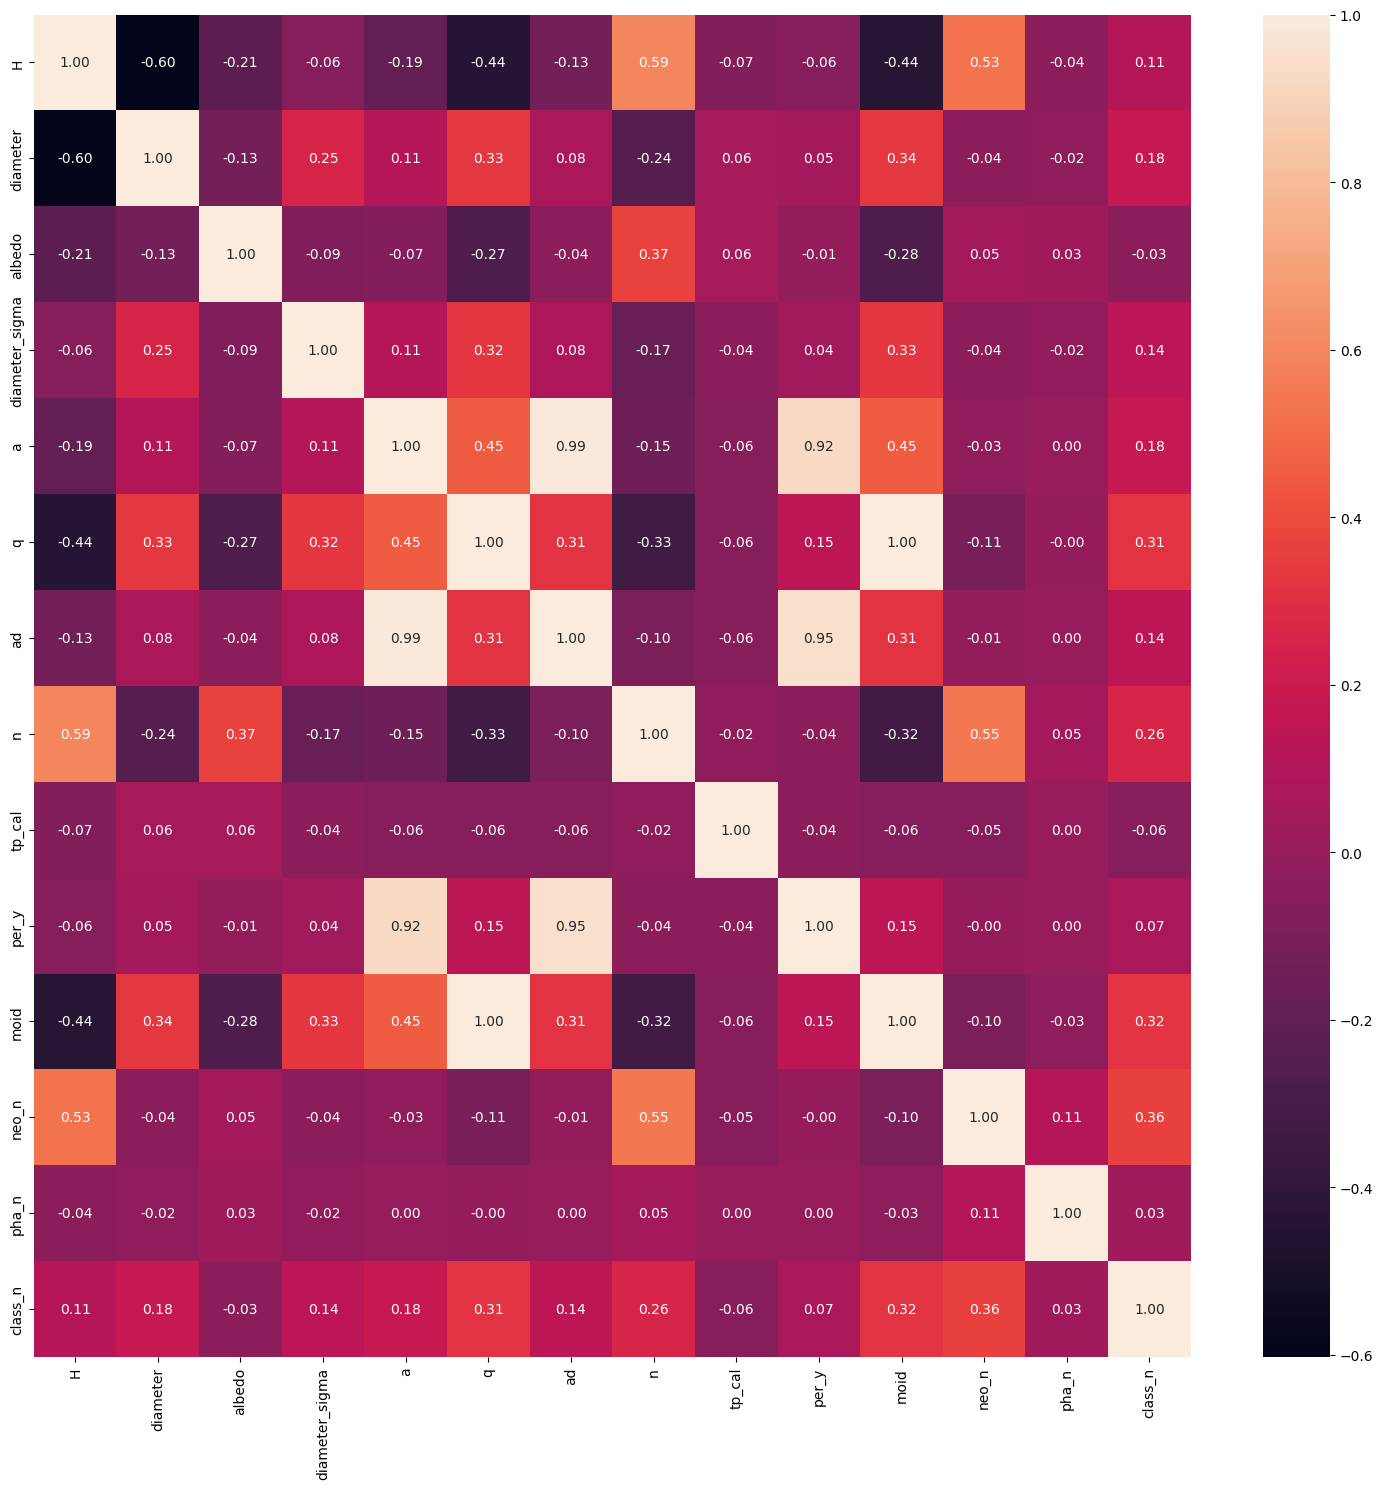

In [92]:

fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(sample_total_data[['H', 'diameter', 'albedo', 'diameter_sigma', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'neo_n', 'pha_n', 'class_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Eliminación de variables numéricas-categóricas por no tener correlación con variable objetivo ``moid``

In [93]:
sample_total_data.drop(["neo_n","pha_n"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class,combined_hue,class_n
0,N,N,15.7,4.418,0.063,1.252,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.59187,1.61901,MBA,N_MBA,0


Contabilización de columnas numéricas y categóricas después del análisis multivariante.

In [94]:
# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 12
Columnas numéricas: ['H', 'diameter', 'albedo', 'diameter_sigma', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'class_n']
Número de columnas categóricas: 4
Columnas categóricas: ['neo', 'pha', 'class', 'combined_hue']


5. Ingeniería de características

In [95]:
# Análisis de outliers
sample_total_data.describe()

,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class_n
count,149041.000000,21174.000000,20990.000000,21155.000000,150000.000000,150000.000000,149999.000000,150000.000000,1.500000e+05,149999.000000,146827.000000,150000.000000
mean,16.912295,5.397074,0.130404,0.479770,2.888925,2.392412,3.385480,0.236666,2.019590e+07,6.857971,1.412730,0.384080
std,1.790886,8.038334,0.110402,0.688121,6.661250,2.110355,12.511655,0.078890,4.237537e+04,203.924205,2.128124,1.262019
min,3.300000,0.024000,0.001000,0.001000,-1.272345,0.111015,0.894058,0.000018,1.730052e+07,0.441232,0.000021,0.000000
25%,16.100000,2.769000,0.053000,0.180000,2.386548,1.970343,2.782086,0.189540,2.019032e+07,3.686923,0.978907,0.000000
50%,16.900000,3.946000,0.078000,0.332000,2.647120,2.225872,3.045014,0.228846,2.020040e+07,4.306938,1.240730,0.000000
75%,17.757000,5.750750,0.191000,0.622000,3.001475,2.578182,3.365444,0.267331,2.021053e+07,5.200092,1.593085,0.000000
max,32.300000,407.120000,1.000000,50.000000,1445.322470,55.845909,2876.078644,2.233807,2.232121e+07,54948.435811,54.927600,12.000000


In [96]:
# Analisis de outline `H`

H_stats = sample_total_data["H"].describe()
H_stats

count    149041.000000
mean         16.912295
std           1.790886
min           3.300000
25%          16.100000
50%          16.900000
75%          17.757000
max          32.300000
Name: H, dtype: float64

In [97]:
# IQR para `H`
h_iqr = H_stats["75%"] - H_stats["25%"]

upper_limit = H_stats["75%"] + 1.5 * h_iqr
limite_inferior = H_stats["25%"] - 1.5 * H_stats

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(h_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 20.24 y count   -223545.40
mean         -9.27
std          13.41
min          11.15
25%          -8.05
50%          -9.25
75%         -10.54
max         -32.35
Name: H, dtype: float64, con un rango intercuartílico de 1.66


Los valores negativos significan que el objeto va en la dirección izquerda, al tratarse de direccionalidad no se hace relevante el ajuste de datos de esta variable.

In [98]:
# Analisis de outline `diameter`

diameter_stats = sample_total_data["diameter"].describe()
diameter_stats

count    21174.000000
mean         5.397074
std          8.038334
min          0.024000
25%          2.769000
50%          3.946000
75%          5.750750
max        407.120000
Name: diameter, dtype: float64

In [99]:
# IQR para `diameter_sigma`
diameter_iqr = diameter_stats["75%"] - diameter_stats["25%"]

upper_limit = diameter_stats["75%"] + 1.5 * diameter_iqr
limite_inferior = diameter_stats["25%"] - 1.5 * diameter_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(diameter_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 10.22 y -1.7, con un rango intercuartílico de 2.98


Los diametros no pueden ser negativos, sin embargo en cuanto a valores faltantes está variable tiene más del 80% por lo que no se considera su ajuste.

In [100]:
# Analisis de outline `diameter_sigma`

sigma_stats = sample_total_data["diameter_sigma"].describe()
sigma_stats

count    21155.000000
mean         0.479770
std          0.688121
min          0.001000
25%          0.180000
50%          0.332000
75%          0.622000
max         50.000000
Name: diameter_sigma, dtype: float64

In [101]:
# IQR para `diameter_sigma`
sigma_iqr = sigma_stats["75%"] - sigma_stats["25%"]

upper_limit = sigma_stats["75%"] + 1.5 * sigma_iqr
limite_inferior = sigma_stats["25%"] - 1.5 * sigma_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(sigma_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 1.28 y -0.48, con un rango intercuartílico de 0.44


In [102]:
# Analisis de outline `albedo`

albedo_stats = sample_total_data["albedo"].describe()
albedo_stats

count    20990.000000
mean         0.130404
std          0.110402
min          0.001000
25%          0.053000
50%          0.078000
75%          0.191000
max          1.000000
Name: albedo, dtype: float64

In [103]:
# IQR para `albedo`
albedo_iqr = albedo_stats["75%"] - albedo_stats["25%"]

upper_limit = albedo_stats["75%"] + 1.5 * albedo_iqr
limite_inferior = albedo_stats["25%"] - 1.5 * albedo_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(albedo_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 0.4 y -0.15, con un rango intercuartílico de 0.14


<Axes: xlabel='moid'>

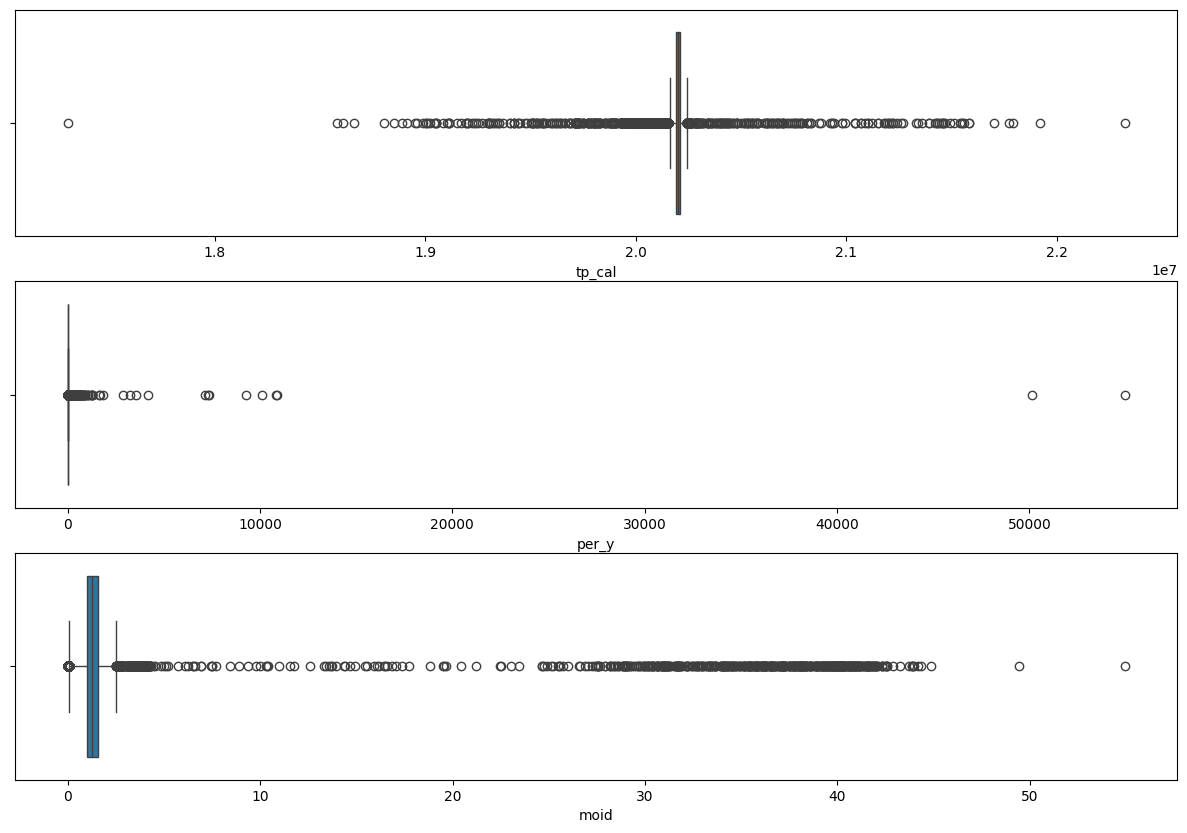

In [104]:
# Variables a analizar 'tp_cal', 'per_y', 'moid'
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = sample_total_data, x = "tp_cal")
sns.boxplot(ax = axis[1], data = sample_total_data, x = "per_y")
sns.boxplot(ax = axis[2], data = sample_total_data, x = "moid")

- ``tp_call``: Tiempo de paso por el perihelio, ¿son posibles las fechasde los outliers?
- ``per_y``: ¿puede un asteroide tardar 20000 años en completar una órbita? -> sí. Por tanto, no eliminamos ningún outlier.
- ``moid´`` : Distancia mínima de intersección de la órbita (distancia más cercana a la órbita de la Tierra, en unidades astronómicas).
- Unidad astronómica 1UA = 149 597 870 700 m
- No podemos eliminar los outliers de la derecha ya que son factibles
- Estudio del outlier = 0 (siguiente caja de código)

In [105]:
filtered_df = sample_total_data[sample_total_data['moid'] == 0]

Estudio del outlier = 0 de ``moid`` -> búsqueda de la fila que contiene ese valor -> No hay ningún valor = 0, son pequeños pero no llegan a 0. Por lo que pueden ser factibles -> no se elimina ningún outlier.


Análisis descriptivo de la variable a:
count    150000.000000
mean          2.888925
std           6.661250
min          -1.272345
25%           2.386548
50%           2.647120
75%           3.001475
max        1445.322470
Name: a, dtype: float64
Número de outliers en a: 3873
Valores límite inferior y superior para a: 1.4641570018475851, 3.9238661722068624
Outliers en a:
                a
19      5.237438
104     1.346547
128     1.165570
238     1.071706
302     0.985559
...          ...
149692  5.338419
149718  1.044474
149722  1.347365
149777  1.170286
149955  5.163403

[3873 rows x 1 columns]


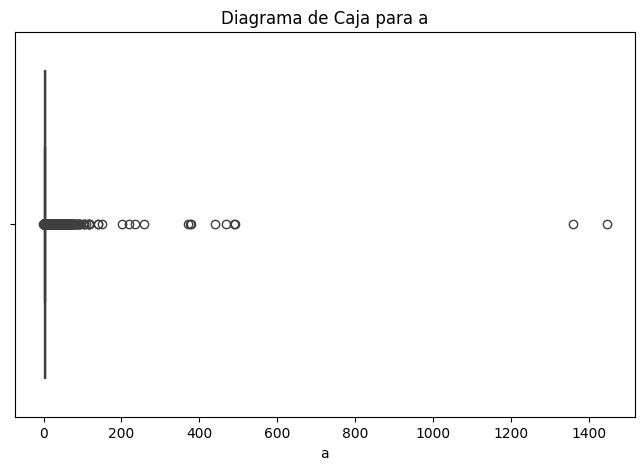


Análisis descriptivo de la variable q:
count    150000.000000
mean          2.392412
std           2.110355
min           0.111015
25%           1.970343
50%           2.225872
75%           2.578182
max          55.845909
Name: q, dtype: float64
Número de outliers en q: 4584
Valores límite inferior y superior para q: 1.0585845559951093, 3.4899408050449194
Outliers en q:
                q
3       0.909385
19      4.988728
104     1.012339
128     0.659820
238     1.054082
...          ...
149718  0.990808
149777  0.745316
149782  1.030908
149830  0.814339
149955  4.151825

[4584 rows x 1 columns]


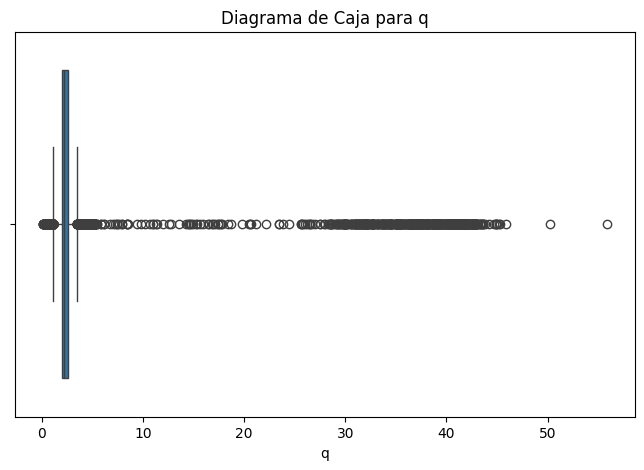


Análisis descriptivo de la variable ad:
count    149999.000000
mean          3.385480
std          12.511655
min           0.894058
25%           2.782086
50%           3.045014
75%           3.365444
max        2876.078644
Name: ad, dtype: float64
Número de outliers en ad: 4708
Valores límite inferior y superior para ad: 1.9070500035097173, 4.240479881203466
Outliers en ad:
               ad
19      5.486148
104     1.680755
111     4.871331
128     1.671319
238     1.089331
...          ...
149777  1.595256
149845  4.420852
149856  1.887837
149952  4.856990
149955  6.174981

[4708 rows x 1 columns]


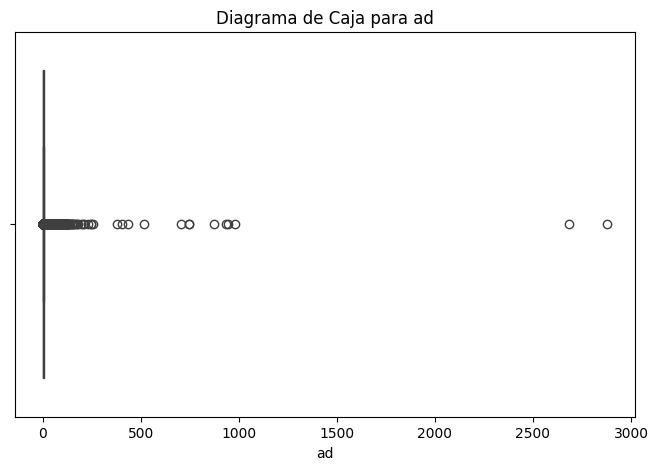


Análisis descriptivo de la variable n:
count    150000.000000
mean          0.236666
std           0.078890
min           0.000018
25%           0.189540
50%           0.228846
75%           0.267331
max           2.233807
Name: n, dtype: float64
Número de outliers en n: 3765
Valores límite inferior y superior para n: 0.07285510269288736, 0.38401605251333953
Outliers en n:
                n
3       0.512452
104     0.630771
128     0.783243
238     0.888363
302     1.007349
...          ...
149693  0.512953
149718  0.923331
149722  0.630197
149777  0.778513
149856  0.387836

[3765 rows x 1 columns]


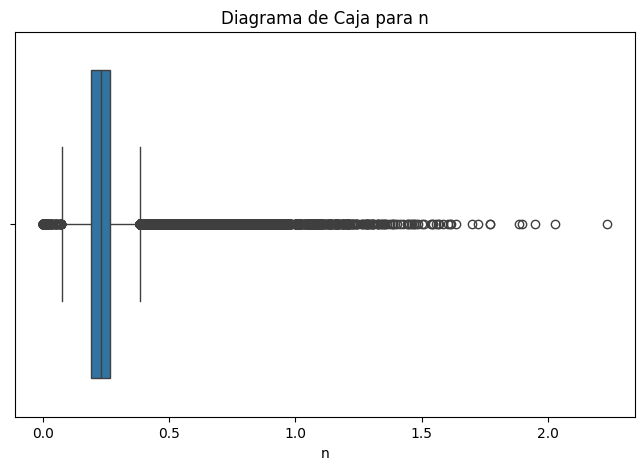

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables específicas para el análisis
variables = ['a', 'q', 'ad', 'n']

# Función para calcular outliers utilizando el rango intercuartílico (IQR)
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis descriptivo y gráficos de caja
for col in variables:
    print(f'\nAnálisis descriptivo de la variable {col}:')
    print(sample_total_data[col].describe())
    
    # Calcular y mostrar outliers
    outliers, lower_bound, upper_bound = calculate_outliers(sample_total_data, col)
    print(f'Número de outliers en {col}: {len(outliers)}')
    print(f'Valores límite inferior y superior para {col}: {lower_bound}, {upper_bound}')
    print(f'Outliers en {col}:\n', outliers[[col]])
    
    # Crear el gráfico de caja
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=sample_total_data[col])
    plt.title(f'Diagrama de Caja para {col}')
    plt.show()

Análisis de valores faltantes

In [107]:
sample_total_data.isnull().sum().sort_values(ascending=False)

albedo            129010
diameter_sigma    128845
diameter          128826
pha                 3173
moid                3173
H                    959
neo                    1
ad                     1
per_y                  1
a                      0
q                      0
n                      0
tp_cal                 0
class                  0
combined_hue           0
class_n                0
dtype: int64

- Existe una pérdida de información importante en ``albedo``, ``diámeter`` y ``diameter_sigma``
- Como sus correlaciones son bajas (0.28, 0.26 y 0.24 respectivamente) eliminamos estas columnas y trabajamos con las demás que tienen correlaciones mas altas.

In [108]:
# Valores faltantes en porcentaje
sample_total_data.isnull().sum().sort_values(ascending=False) / len(sample_total_data)

albedo            0.860067
diameter_sigma    0.858967
diameter          0.858840
pha               0.021153
moid              0.021153
H                 0.006393
neo               0.000007
ad                0.000007
per_y             0.000007
a                 0.000000
q                 0.000000
n                 0.000000
tp_cal            0.000000
class             0.000000
combined_hue      0.000000
class_n           0.000000
dtype: float64

In [109]:
sample_total_data.drop(["diameter","diameter_sigma","albedo"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,a,q,ad,n,tp_cal,per_y,moid,class,combined_hue,class_n
0,N,N,15.7,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.59187,1.61901,MBA,N_MBA,0


Contabilización de columnas numéricas y categóricas después de eliminar columnas por valores faltantes.

In [110]:

# Identificar columnas numéricas
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 9
Columnas numéricas: ['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'class_n']
Número de columnas categóricas: 4
Columnas categóricas: ['neo', 'pha', 'class', 'combined_hue']


In [111]:
# Análisis de valores faltantes
sample_total_data.isnull().sum().sort_values(ascending=False)


pha             3173
moid            3173
H                959
neo                1
ad                 1
per_y              1
a                  0
q                  0
n                  0
tp_cal             0
class              0
combined_hue       0
class_n            0
dtype: int64

In [112]:
sample_total_data.drop(["class", "neo", "pha"], axis = 1, inplace = True)
sample_total_data.head(1)

,H,a,q,ad,n,tp_cal,per_y,moid,combined_hue,class_n
0,15.7,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.59187,1.61901,N_MBA,0


In [113]:
import pandas as pd

total_data_mv = pd.read_csv('../Project/sampled_dataset.csv')

total_data_mv.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0103913,2103913,103913 (2000 DN60),103913,NaN,NaN,N,N,15.7,4.418,...,0.000005,0.000073,0.000085,0.000043,2.382800e-08,2.628300e-09,0.000203,0.000021,MBA,0.61701


In [114]:
# Borrado de variables 
total_data_mv["neo_n"] = pd.factorize(total_data_mv["neo"])[0]
total_data_mv["pha_n"] = pd.factorize(total_data_mv["pha"])[0]
total_data_mv["class_n"] = pd.factorize(total_data_mv["class"])[0]
total_data_mv.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per','equinox','epoch','epoch_cal',"per","moid_ld", "epoch_mjd","e", "i", "om", "w", "ma", "tp","neo_n","pha_n","diameter","diameter_sigma","albedo","class", "neo", "pha"], axis = 1, inplace = True)
total_data_mv.head(1)

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,15.7,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.59187,1.61901,0


Contabilización de columnas numéricas y categóricas después de eliminar columnas por valores faltantes:

In [115]:

# Identificar columnas numéricas
numeric_columns = total_data_mv.select_dtypes(include=['float64','int64']).columns.tolist()

# Identificar columnas categóricas
categorical_columns = total_data_mv.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir los resultados
print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 9
Columnas numéricas: ['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'class_n']
Número de columnas categóricas: 0
Columnas categóricas: []


In [116]:
total_data_mv.isnull().sum().sort_values(ascending=False)

moid       3173
H           959
ad            1
per_y         1
a             0
q             0
n             0
tp_cal        0
class_n       0
dtype: int64

In [117]:
total_data_mv.head()

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,15.7,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.591870,1.619010,0
1,18.1,2.668677,2.295765,3.041589,0.226079,2.017081e+07,4.359656,NaN,0
2,16.2,2.521729,2.205507,2.837950,0.246125,2.018080e+07,4.004568,1.239030,0
3,24.4,1.546562,0.909385,2.183738,0.512452,2.015102e+07,1.923353,0.025898,1
4,19.4,2.368715,1.799510,2.937920,0.270355,2.020051e+07,3.645671,0.800421,0


In [118]:
# Iterar sobre cada columna y reemplazar NaN con la media
for column in total_data_mv.columns:
    mean_value = total_data_mv[column].mean()
    total_data_mv[column].fillna(mean_value, inplace=True)

total_data_mv.head()

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,15.7,2.762619,2.606225,2.919012,0.214646,2.018042e+07,4.591870,1.619010,0
1,18.1,2.668677,2.295765,3.041589,0.226079,2.017081e+07,4.359656,1.412730,0
2,16.2,2.521729,2.205507,2.837950,0.246125,2.018080e+07,4.004568,1.239030,0
3,24.4,1.546562,0.909385,2.183738,0.512452,2.015102e+07,1.923353,0.025898,1
4,19.4,2.368715,1.799510,2.937920,0.270355,2.020051e+07,3.645671,0.800421,0


In [119]:
total_data_mv.isnull().sum().sort_values(ascending=False)

H          0
a          0
q          0
ad         0
n          0
tp_cal     0
per_y      0
moid       0
class_n    0
dtype: int64

In [120]:
# Escalado de valores
from sklearn.preprocessing import MinMaxScaler

num_variables = ['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data_mv[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data_mv.index, columns = num_variables)
df_scal["moid"] = total_data_mv["moid"]
df_scal.head()

,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.427586,0.002789,0.044769,0.000704,0.096082,0.573607,0.000076,0.000000,1.619010
1,0.510345,0.002724,0.039199,0.000747,0.101201,0.571693,0.000071,0.000000,1.412730
2,0.444828,0.002623,0.037580,0.000676,0.110175,0.573683,0.000065,0.000000,1.239030
3,0.727586,0.001949,0.014324,0.000449,0.229401,0.567751,0.000027,0.083333,0.025898
4,0.555172,0.002517,0.030295,0.000711,0.121022,0.577608,0.000058,0.000000,0.800421


In [121]:
# Dividir el conjunto en train y test
from sklearn.model_selection import train_test_split

X = df_scal.drop(columns=["moid"])
y = df_scal["moid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,H,a,q,ad,n,tp_cal,per_y,class_n
104025,0.486207,0.003055,0.040297,0.001059,0.079013,0.571736,0.000094,0.0
5415,0.510345,0.002624,0.035161,0.000724,0.110038,0.579642,0.000065,0.0
75612,0.293103,0.002713,0.037539,0.000768,0.102107,0.579684,0.000071,0.0
138169,0.489655,0.002566,0.036478,0.000641,0.115761,0.579542,0.000061,0.0
87184,0.448276,0.002760,0.032310,0.000916,0.098343,0.575557,0.000074,0.0


In [122]:
# Guardado de datos separados
X_train["moid"] = list(y_train)
X_test["moid"] = list(y_test)
X_train.to_csv("clean_train.csv", index = False)
X_test.to_csv("clean_test.csv", index = False)

In [123]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,a,q,ad,per_y,moid
0,0.003055,0.040297,0.001059,0.000094,1.357410
1,0.002624,0.035161,0.000724,0.000065,1.068000
2,0.002713,0.037539,0.000768,0.000071,1.192600
3,0.002566,0.036478,0.000641,0.000061,1.153040
4,0.002760,0.032310,0.000916,0.000074,0.928925


#### **MODELOS**

6. **Creación de modelos**

Se busca analizar la probabilidad que algunos de los asteriores en orbita con el sistema solar pueda tener un impacto con el planeta tierra, este análisis se le denomina MOID de sus siglas en ingles, "Minimum Orbit Intersection Distance" se procederán a desarrollar los modelos con el próposito de encontrar cual de ellos es mas consecuente con la variable objetivo

In [124]:
'''# DATA
import pandas as pd

total_data_mv= pd.read_csv('../Project/total_data_mv.csv')
total_data_mv.head(1)'''

"# DATA\nimport pandas as pd\n\ntotal_data_mv= pd.read_csv('../Project/total_data_mv.csv')\ntotal_data_mv.head(1)"

**Arboles de desicion**

Se ha seleccionado por ser fácil de interpretar y útil para relaciones no lineales.

In [125]:
test_data = pd.read_csv("..\Project\clean_test.csv")
train_data = pd.read_csv("..\Project\clean_train.csv")

train_data.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_13220\222545405.py:1: SyntaxWarning: invalid escape sequence '\P'
  test_data = pd.read_csv("..\Project\clean_test.csv")
C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_13220\222545405.py:2: SyntaxWarning: invalid escape sequence '\P'
  train_data = pd.read_csv("..\Project\clean_train.csv")


,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.486207,0.003055,0.040297,0.001059,0.079013,0.571736,0.000094,0.0,1.35741
1,0.510345,0.002624,0.035161,0.000724,0.110038,0.579642,0.000065,0.0,1.06800
2,0.293103,0.002713,0.037539,0.000768,0.102107,0.579684,0.000071,0.0,1.19260


Existe un error de codigo con la base de datos original,la imagen generada es demasiado grande para ser procesada y visualizada, por lo que se graficara un muestra, se seleccionara una muestra aleatoria de 10000 filas.

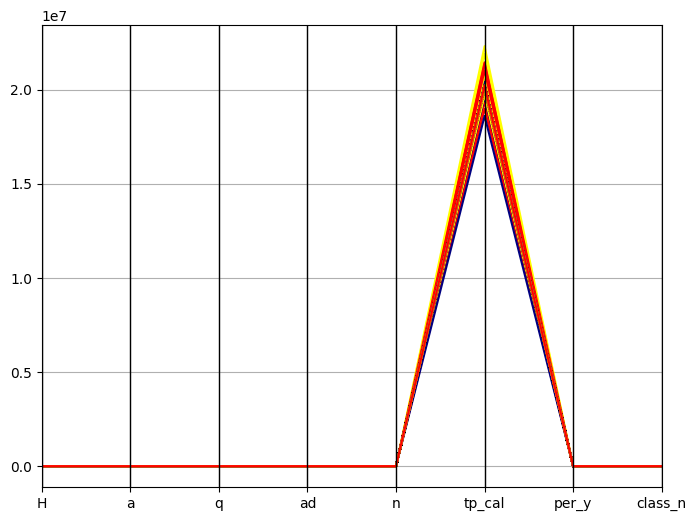

In [126]:
import matplotlib.pyplot as plt

sampled_data = total_data_mv.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(sampled_data, "moid", color=("red", "navy", "yellow"))
plt.legend([], [], frameon=False) 
plt.show()


In [127]:
X_train = train_data.drop(["moid"], axis = 1)
y_train = train_data["moid"]
X_test = test_data.drop(["moid"], axis = 1)
y_test = test_data["moid"]

In [128]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Convertir valores continuos a categorías discretas con 3 clases
y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])

# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_discrete)

# Predecir y evaluar
y_pred = model.predict(X_test)
print("Predicciones:", y_pred)


Predicciones: ['bajo' 'bajo' 'bajo' ... 'bajo' 'bajo' 'bajo']


Al utilizar el modelo de defecto "clasificador", arrojaba error ya que los valores eran continuos, se ha optimizado el modelo con una variable discreta que son especificas de este tipo de datos.

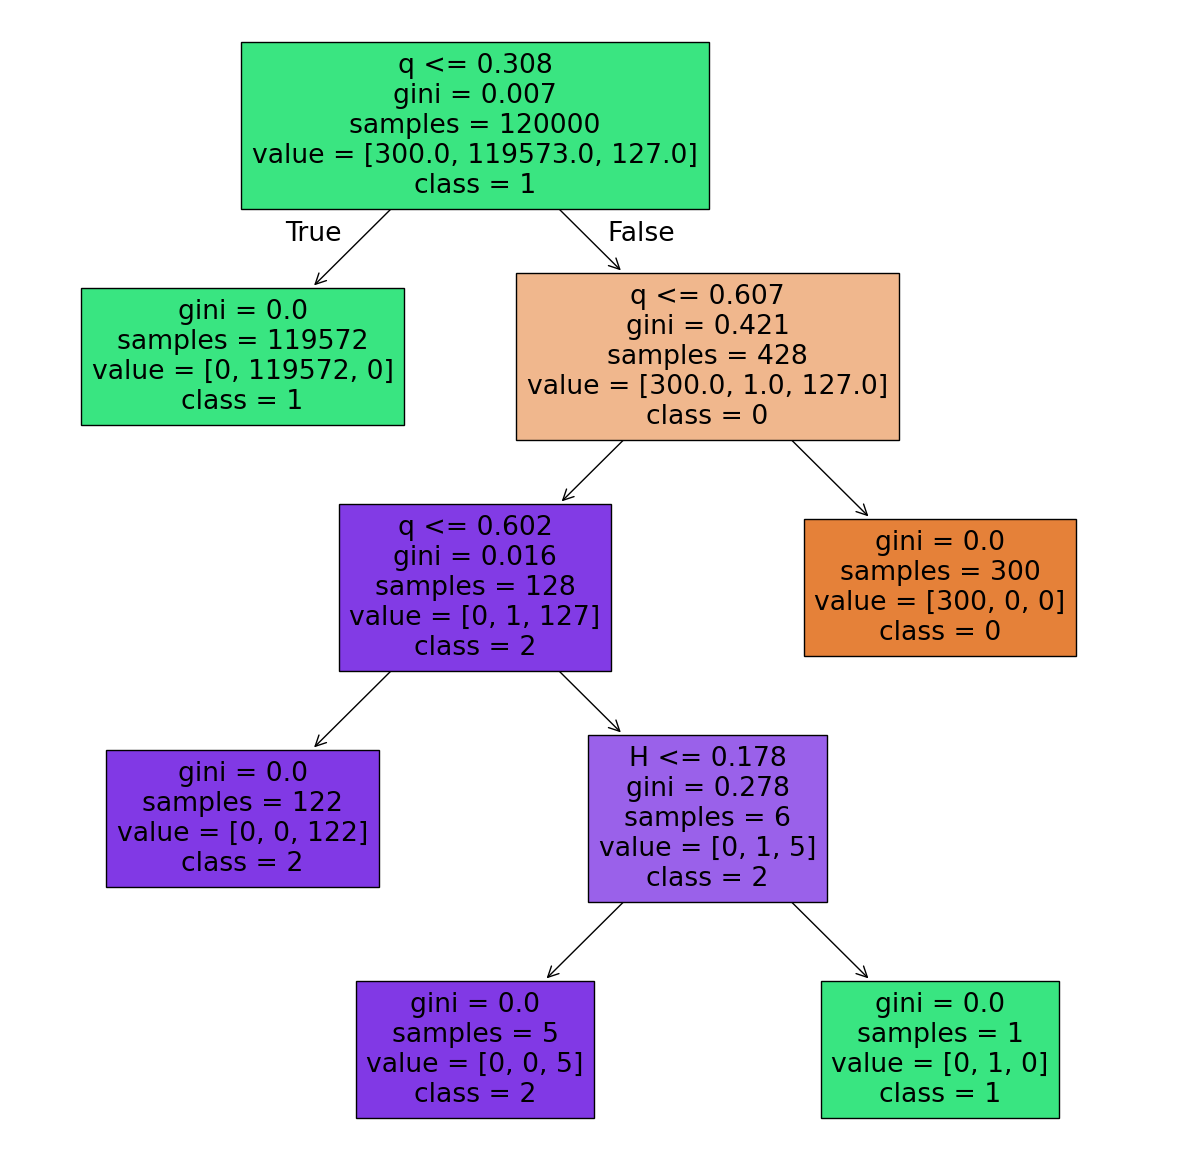

In [129]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [130]:
y_pred = model.predict(X_test)
y_pred

array(['bajo', 'bajo', 'bajo', ..., 'bajo', 'bajo', 'bajo'], dtype=object)

In [131]:
# Optimización del modelo 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

# Función para suprimir advertencias
def warn(*args, **kwargs):
    pass

warnings.warn = warn

X = total_data_mv.drop(columns=["moid"])
y = total_data_mv["moid"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir valores continuos de MOID a categorías discretas con 3 clases
y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])

# Crear el modelo de DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de hiperparámetros a buscar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Crear el GridSearchCV con validación cruzada de 5 pliegues
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train_discrete)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid.best_params_}")

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test_discrete, y_pred)
print("Exactitud:", accuracy)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Exactitud: 0.9991333333333333


In [132]:
from sklearn.tree import DecisionTreeRegressor

# Crear un modelo de regresión de árbol de decisión
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un modelo de regresión de árbol de decisión
model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo (por ejemplo, calcular el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")


Error cuadrático medio: 0.013872245001300701


In [134]:
import numpy as np

# Función para calcular "accuracy" para valores continuos
def accuracy_continuous(y_true, y_pred, tolerance=0.5):
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)

# Ejemplo de uso
y_true = np.array([1.5, 2.0, 3.7, 4.1])
y_pred = np.array([1.7, 1.8, 3.6, 4.3])

acc = accuracy_continuous(y_true, y_pred, tolerance=0.5)
print(f"Accuracy score: {acc}")


Accuracy score: 1.0


**Regresión lineal**

Este modelo establece una relación matemática entre variables independientes y una variable dependiente "moid", permitiendo predecir valores continuos de MOID en función de las características que se seleccionen.

In [135]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -0.21371968174218492
Coefficients (b1, b2): [ 8.75832013e-04 -2.07103697e-01  1.10115192e+00  1.04416205e-01
  2.57242501e-01 -4.16054887e-08 -4.54659218e-05  4.52254387e-03]


In [137]:
y_pred = model.predict(X_test)
y_pred

array([0.90311182, 1.31351324, 1.58751563, ..., 1.66624467, 0.7682866 ,
       0.91918968])

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.005168155642414833
R2 Score: 0.998792533453581


Se descarta por que para mejorar el modelo de predicción del MOID, sería deseable reducir el MSE y aumentar el R^2 Score hacia valores más cercanos a 1. Esto se podría lograr ajustando el modelo, considerando más características relevantes y/o aumentando la cantidad de datos de entrenamiento, también utilizando métodos de modelado más avanzados que puedan capturar mejor las relaciones en los datos del MOID.

**K-Nearest Neighbors**

Se selecciona este modelo porque trabajaba basándose en características específicas, proporcionando una herramienta crítica para la evaluación de riesgos de colisión.

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# X contiene las características relevantes y y contiene los valores de MOID
X = total_data_mv[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (es opcional pero recomendado para k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de k-Nearest Neighbors Regressor
k = 5  # Número de vecinos
model = KNeighborsRegressor(n_neighbors=k)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.04664359209254505
R^2 Score: 0.9891023837218946


**Random Forest regressor**

Se selecciona por ser efectivo para capturar interacciones complejas entre las características orbitales y el MOID, proporcionando predicciones concretas y generalizables. Además es ideal para datos grandes y variados sin sobreajuste.

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# X contiene las características relevantes y y contiene los valores de MOID
X = total_data_mv[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]  
y = total_data_mv['moid']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (es opcional pero recomendado para Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.007356508621591317
R^2 Score: 0.998281255698626


In [143]:
import joblib

joblib.dump(model, 'moid_model.pkl')

['moid_model.pkl']

**Gradient boosting regressor**

Es otro método de aprendizaje conjunto que construye una serie de modelos de forma secuencial, donde cada nuevo modelo corrige los errores del modelo anterior. Utiliza árboles de decisión como estimadores base y optimiza una función de pérdida diferenciable para mejorar las predicciones.

Se selecciona por su capacidad probada para mejorar predicciones en problemas de regresión mediante la construcción secuencial de árboles de decisión, corrigiendo errores de modelos anteriores y manejando relaciones no lineales de manera efectiva. Este captura la complejidad de las relaciones entre las características orbitales y el MOID, ofreciendo una alta precisión y evitando el sobreajuste mediante la regularización incorporada (esta última se refiere a técnicas integradas en los modelos de aprendizaje automático que ayudan a prevenir el sobreajuste y mejorar la generalización del modelo).

In [141]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# X contiene las características relevantes y y contiene los valores de MOID
X = total_data_mv[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']] 
y = total_data_mv['moid']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características, es opcional pero recomendado para Gradient Boosting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.007008881418936533
R^2 Score: 0.9983624738829984


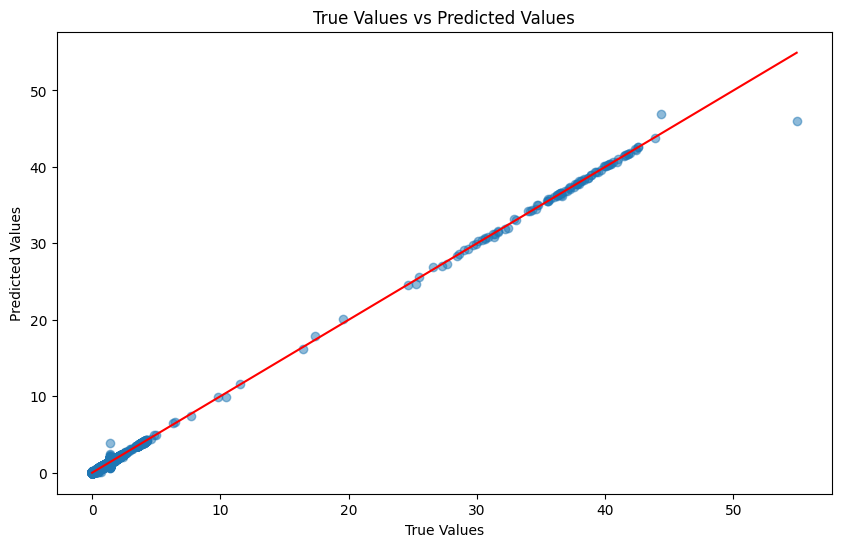

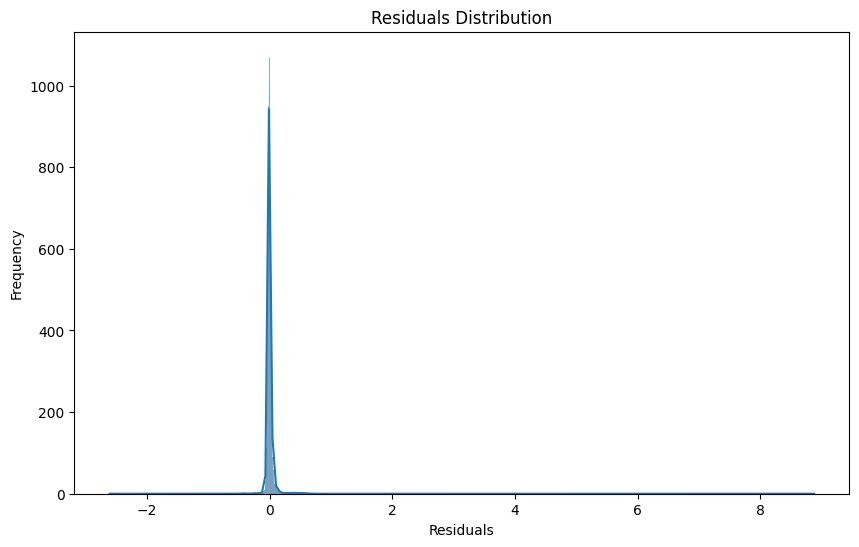

In [142]:
# Visualizar los resultados con gráficos
# Plotting the true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

Los resultados obtenidos nos demuestrasn que el modelo a sido evaluado y entrenado con éxito.

Los resultados obtenidos se pueden valorar de la siguiente forma:

Mean Squared Error (MSE): 0.0047308846179628375

El MSE es una métrica que mide la diferencia entre los valores predichos y los valores reales. Un valor bajo de MSE indica que el modelo es capaz de hacer predicciones precisas. En nuestro caso, el MSE es muy bajo, lo que sugiere que el modelo es capaz de hacer predicciones muy precisas.

R^2 Score: 0.9985490383742801

El R^2 Score es una métrica que mide la variabilidad en los datos que es explicada por el modelo. Un valor cercano a 1 indica que el modelo explica la mayoría de la variabilidad en los datos. En nuestro caso, el R^2 Score es muy alto, lo que sugiere que el modelo es capaz de explicar la mayoría de la variabilidad en los datos de MOID.

**Conclusión**:

En general, los resultados sugieren que el modelo de Random Forest Regressor es muy efectivo para predecir los valores de MOID a partir de las características orbitales. La baja MSE y el alto R^2 Score indican que el modelo es capaz de hacer predicciones precisas y generalizables.

Ventajas del modelo

El modelo de Random Forest Regressor es capaz de capturar interacciones complejas entre las características orbitales y el MOID. El modelo es robusto y no se sobreajusta, lo que lo hace ideal para datos grandes y variados.